In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:

from os import scandir

def cropfile(pathin,pathout, x, y, w, h,ws):
    img = cv2.imread(pathin)
    if ws:
        cv2.imwrite(pathout, img)
    else:
        test_images.append(img)

#Función para encontrar todas las imagenes que están en un directorio    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

#Función para separar el nombre del archivo
def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

#Arreglo de imagenes de prueba
test_images = []

for i in range(1):
    path = "../Imagenes/Unlabel/"
    #Files es un arreglo con todos los nombres de las imagenes que están dentro del path
    files=ls1(path)
    j = 0
    for file in files:
        # Es el path + el nombre de la imagen
        filea=path + file # archivo original
        #sext es la extensión y sfilename y es el nombre del archivo sin la extensión
        sext, sfilename = splitfilename(file)    
        #creación del path de archivo ya con el crop
        filec=path+"rename/" + "Sw"+"-"+str(j) + ".png" # archivo crop    
        j +=1
        print(filec)
        cropfile(filea, filec, 250, 90, 300,200,1)
    cropfile(path+files[0],filec,250,90,300,200,0)

    
        

In [50]:
from preproces import *
def plotimg(img):
    plt.figure(figsize=[8,8])
    plt.imshow(img, cmap = 'gray')
    
    plt.xticks([]),plt.yticks([])
    plt.show()
src = cv2.imread("../Imagenes/Unlabel/Rename/Sw-1.png")
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
src = src_color.copy()
img, rects = contornos(src_color)
plotimg(img)



Hay 7 contornos


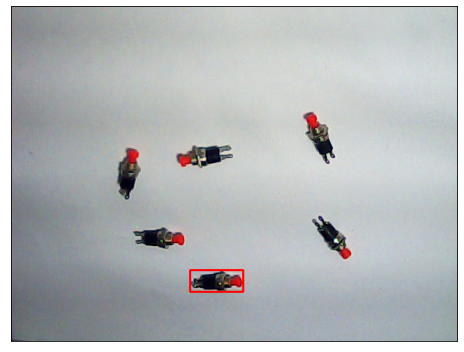

Contorno #0 .. Ingresa el label1
Hay 7 contornos


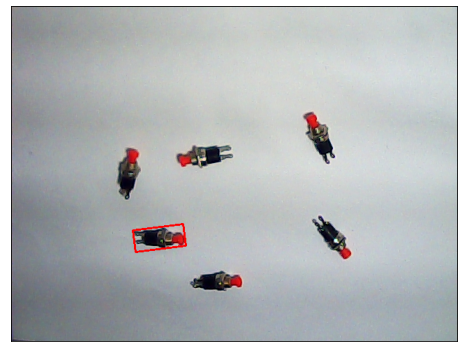

Contorno #1 .. Ingresa el label1
Hay 7 contornos


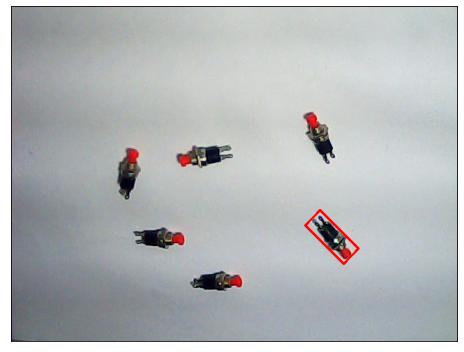

Contorno #2 .. Ingresa el label1
Hay 7 contornos


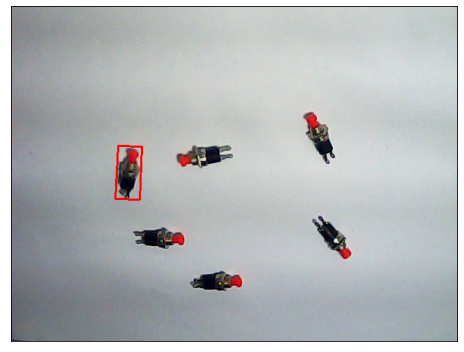

Contorno #3 .. Ingresa el label1
Hay 7 contornos


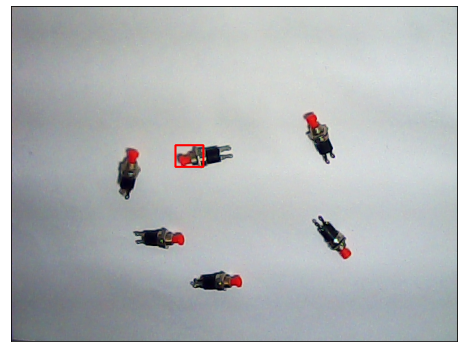

Contorno #4 .. Ingresa el label1
Hay 7 contornos


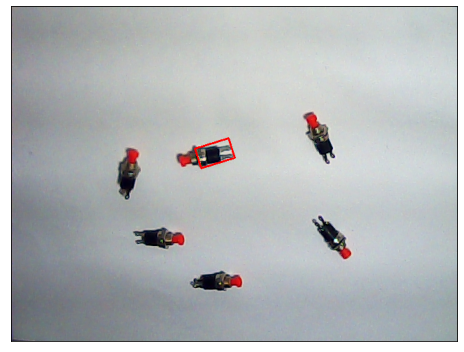

Contorno #5 .. Ingresa el label9
Hay 7 contornos


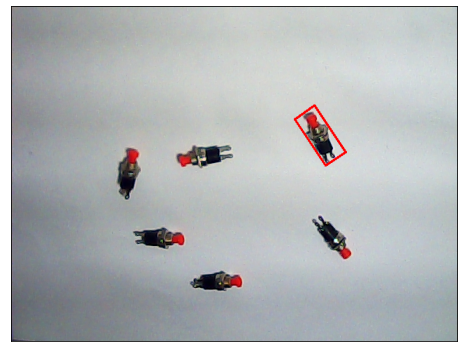

Contorno #6 .. Ingresa el label1
Siguiente imagen Bastardo...
Hay 7 contornos


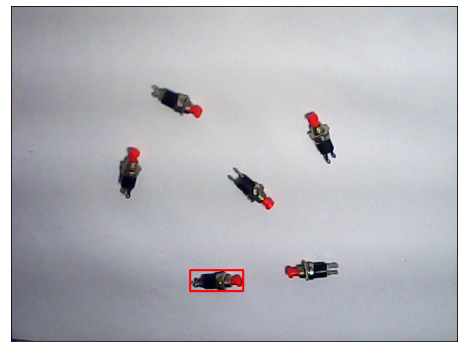

Contorno #0 .. Ingresa el label1
Hay 7 contornos


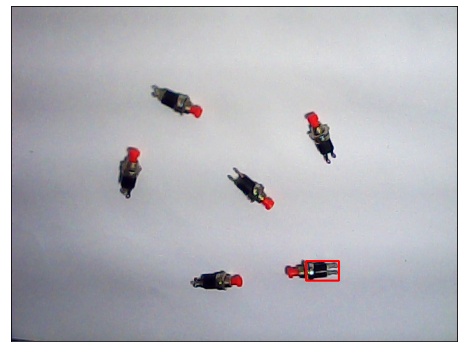

Contorno #1 .. Ingresa el label9
Hay 7 contornos


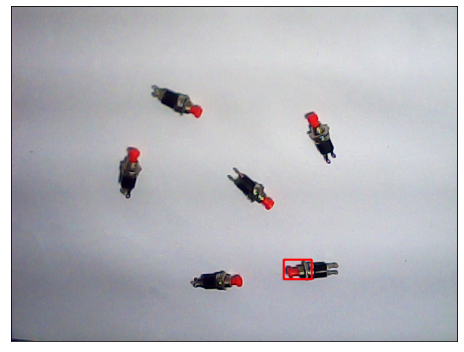

Contorno #2 .. Ingresa el label1
Hay 7 contornos


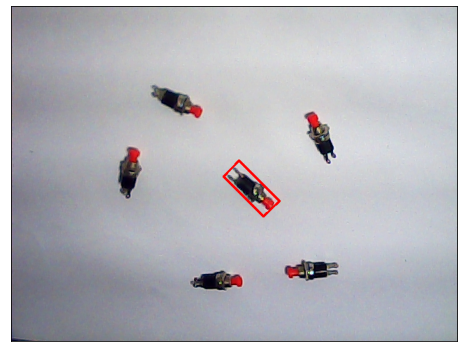

Contorno #3 .. Ingresa el label1
Hay 7 contornos


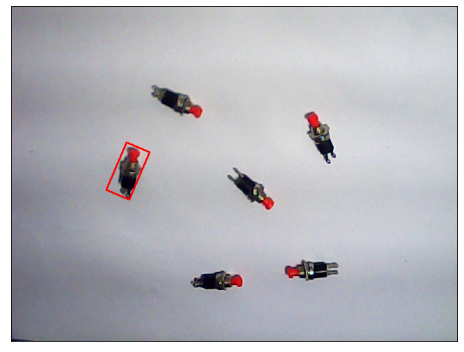

Contorno #4 .. Ingresa el label1
Hay 7 contornos


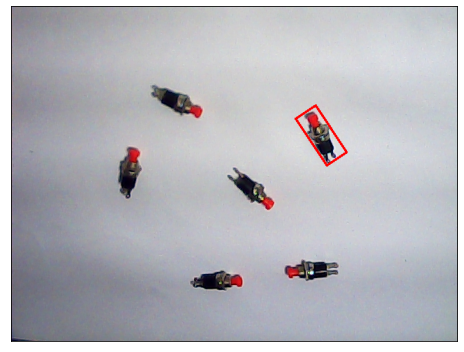

Contorno #5 .. Ingresa el label1
Hay 7 contornos


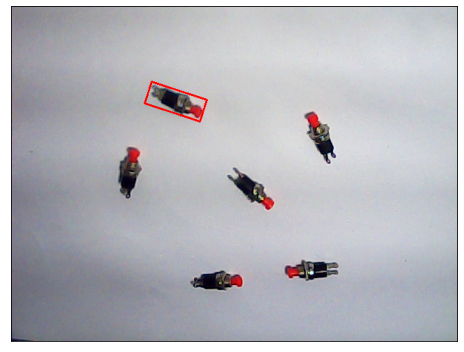

Contorno #6 .. Ingresa el label1
Siguiente imagen Bastardo...


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [218]:
dict_labels = {}
for number in range(1,5):
    labels = []
    src = cv2.imread("../Imagenes/Completo/Modified/S1/Normalizacion/S-"+str(number)+".jpeg")
    src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    src = src_color.copy()
    img, rects = contornos(src_color)
    
    for i in range(len(rects)):
        print("Hay " + str(len(rects))+" contornos")
        copy_img = src.copy()
        img = colorear(rects[i],copy_img)
        plotimg(copy_img)
        label = int(input("Contorno #"+str(i)+" .. Ingresa el label"))
        labels.append(label)
    dict_labels[number] = labels
    
    print("Siguiente imagen Bastardo...")

In [220]:
import csv
with open('dct.csv', 'w') as f:  
    writer = csv.writer(f)
    for k, v in dict_labels.items():
       writer.writerow([k, v])

In [222]:
f= open("dct.csv")
reader = csv.reader(f)
labels = []
for row in reader:
    if row:
        labels.append(row)
        with open('../Imagenes/Completo/Modified/S1/Normalizacion/S1-'+row[0]+'.csv','w') as h:
            writer = csv.writer(h)
            writer.writerow([row[1]])

In [219]:
dict_labels

{1: [1, 1, 1, 1, 1, 9, 1], 2: [1, 9, 1, 1, 1, 1, 1]}

In [89]:
#Rename archivos
from os import scandir
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]
path = '../Imagenes/Completo/Modified/S2/Normalizacion/'
files = ls1(path)
for i,file in enumerate(files):
    if ".csv" in file:
        continue
    print(file)
    filec=path+"S2"+"-"+str(i+11) + ".png"
    img = cv2.imread(path+file)
    cv2.imwrite(filec, img)

Photo-1.jpeg
Photo-10.jpeg
Photo-11.jpeg
Photo-12.jpeg
Photo-13.jpeg
Photo-14.jpeg
Photo-15.jpeg
Photo-16.jpeg
Photo-17.jpeg
Photo-18.jpeg
Photo-19.jpeg
Photo-2.jpeg
Photo-20.jpeg
Photo-21.jpeg
Photo-22.jpeg
Photo-23.jpeg
Photo-24.jpeg
Photo-25.jpeg
Photo-26.jpeg
Photo-27.jpeg
Photo-29.jpeg
Photo-3.jpeg
Photo-30.jpeg
Photo-4.jpeg
Photo-5.jpeg
Photo-6.jpeg
Photo-7.jpeg
Photo-8.jpeg
Photo-9.jpeg


0


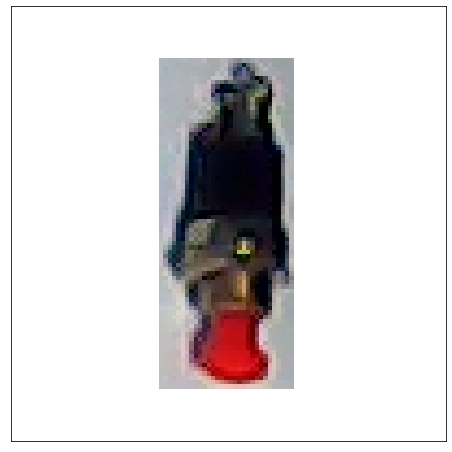

1


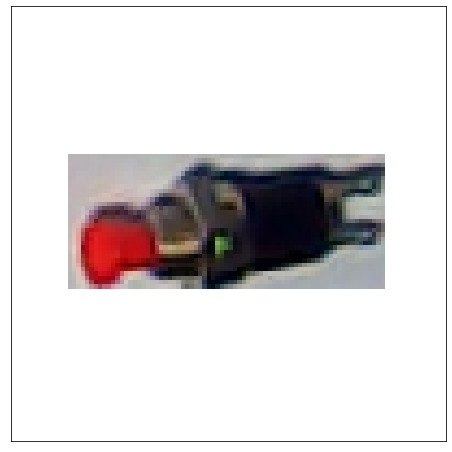

2


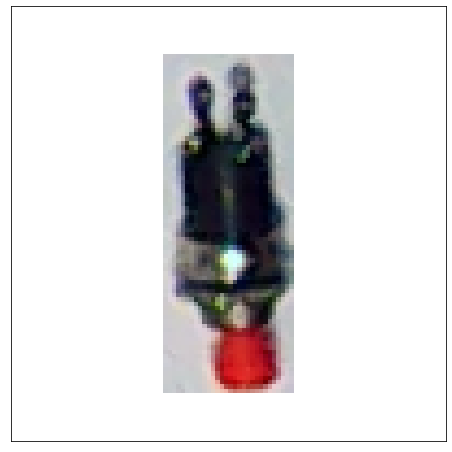

3


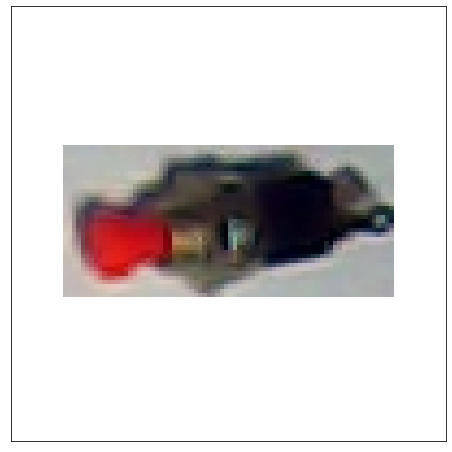

4


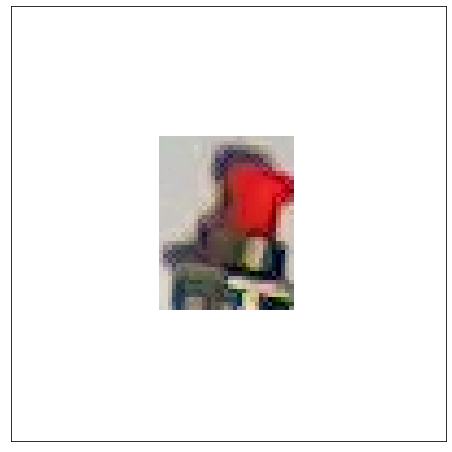

5


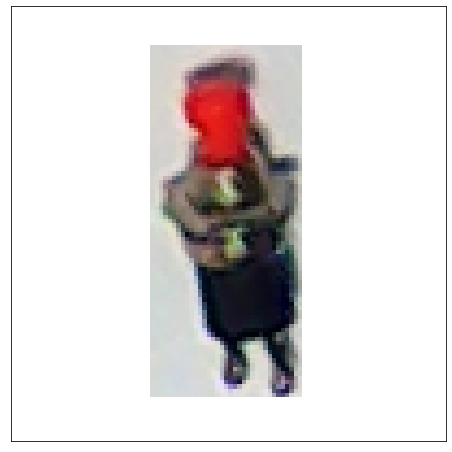

0


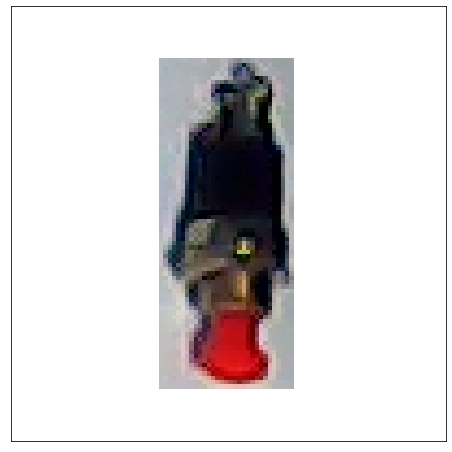

1


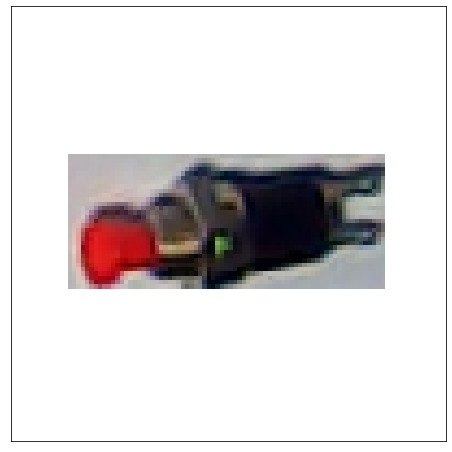

2


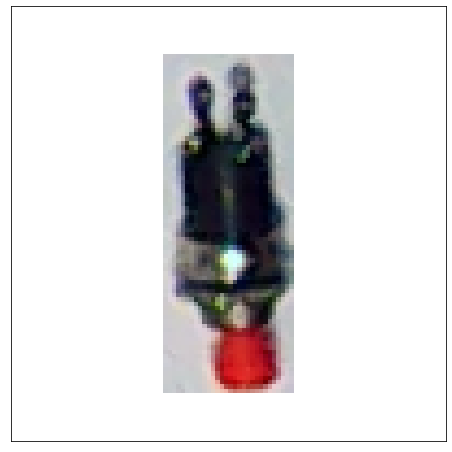

3


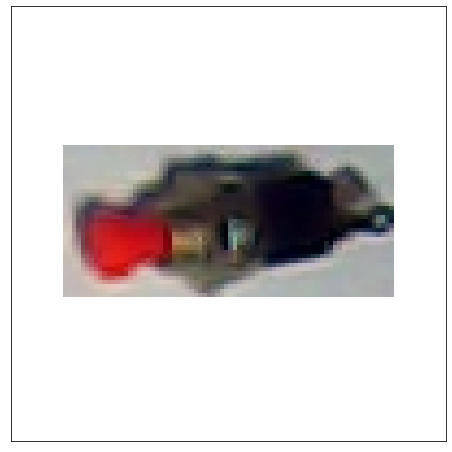

4


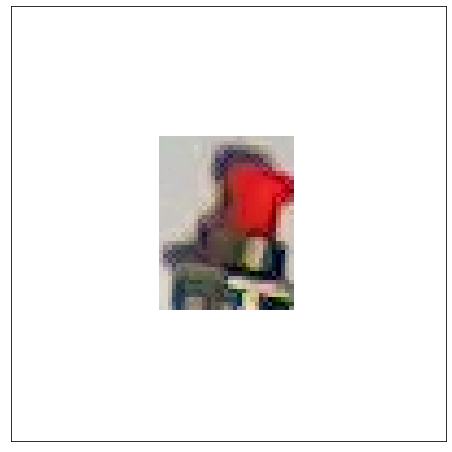

5


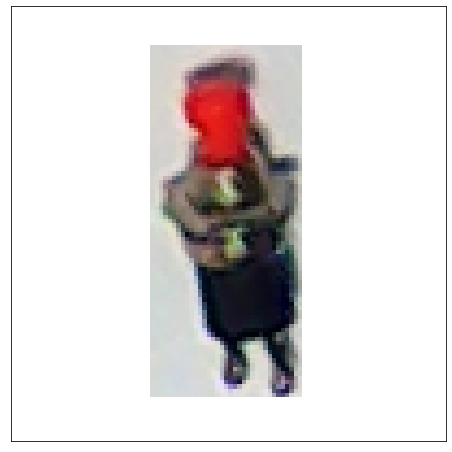

6


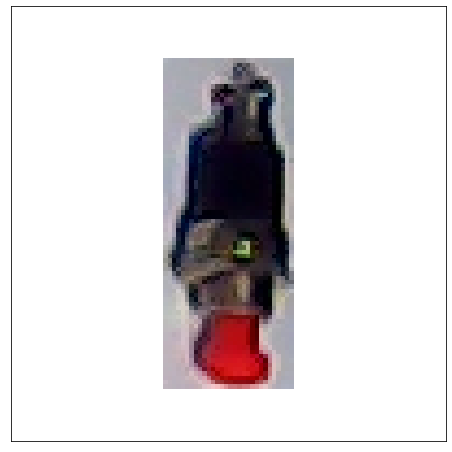

7


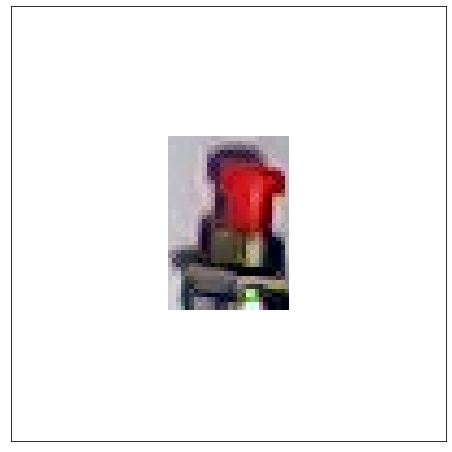

8


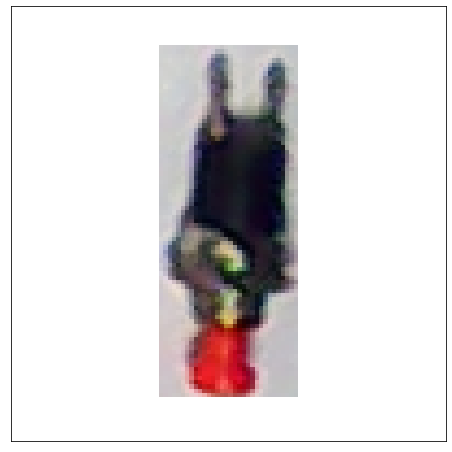

9


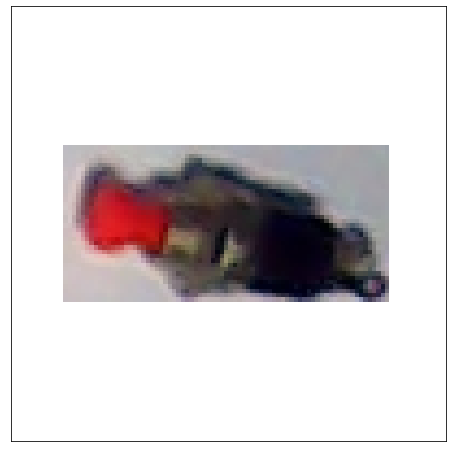

10


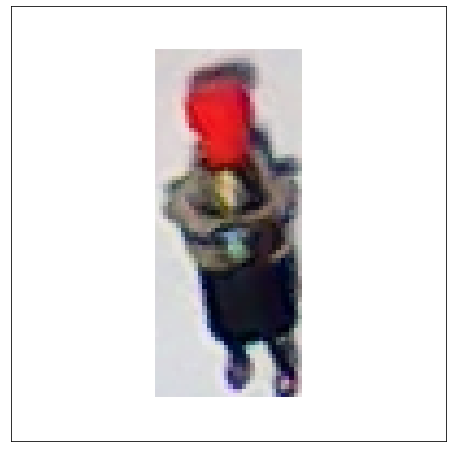

11


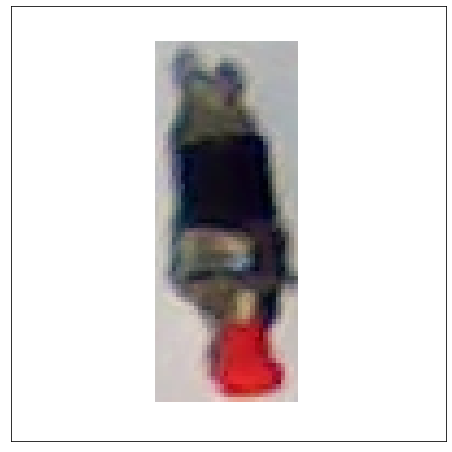

FileNotFoundError: [Errno 2] No such file or directory: '../Imagenes/Completo/Modified/S1/Normalizacion/S1-3.csv'

In [223]:
###Recotar Fotos S6




path = '../Imagenes/Completo/Modified/S1/Normalizacion/'
files = ls1(path)
labels_general = []
norm_images = []

for i in range(1,6):
    labels_img = []
    
    f = open("../Imagenes/Completo/Modified/S1/Normalizacion/S1-"+str(i)+".csv")
    reader = csv.reader(f)
    for row in reader:
        if row:
            labels = row
    for label in labels:
        characters = "'[]"
        label = ''.join( x for x in label if x not in characters)
        
        labels_img.append(label)

    src = cv2.imread(path+"S-"+str(i)+".jpeg")
    src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    color_copy = src_color.copy()
    img, rects = contornos(src_color)
    crop_images = []
    
    
    for i,label in enumerate(labels_img):
        if int(label) >= 1 and int(label) < 6:
            labels_general.append(int(label))
            rect = rects[i]
            angle = rect[2]
            
            rows,cols = color_copy.shape[0], color_copy.shape[1]
            M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
            img_rot = cv2.warpAffine(color_copy,M,(cols,rows))
                # Rota los bounding boxes
            rect0 = (rect[0], rect[1], 0.0)
            box = cv2.boxPoints(rect)
            pts = np.int0(cv2.transform(np.array([box]), M))[0]    
            pts[pts < 0] = 0

            # Realiza el recorte a los contornos
            img_crop = img_rot[pts[1][1]:pts[0][1], 
                           pts[1][0]:pts[2][0]]
            crop_images.append(img_crop)
            
            
          #Imagenes normalizadas
        
    for j,img in enumerate(crop_images):
        #print(j)
        blank = np.ones((100, 100,3), dtype = 'uint8')*255
        w1 = 100
        h1 = 100
        w2 = len(img[1])
        h2 = len(img)
        x_ini = (w1-w2)//2
        y_ini = (h1-h2)//2
        for i in range(len(img)):
            for j in range(len(img[1])):
                for k in range(3):
                    blank[x_ini+j][y_ini+i][k] = img[i][j][k]
        norm_images.append(blank)
            
    for k,img in enumerate(norm_images):
        print(k)
        plotimg(img)
    
            


In [227]:
labels_general = np.array(v1)
np.savetxt("../Imagenes/Completo/Modified/S1/S1.csv", labels_general, delimiter=',')

In [225]:
def saveimages(pathout,img):
    cv2.imwrite(pathout, img)
    
for i,img in enumerate(norm_images):
    path = "../Imagenes/Completo/Modified/S1/Normalizacion/S1-"+str(i+69)+".png"
    im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    saveimages(path,im_bgr)
    

In [229]:
len(norm_images)

29

In [230]:
len(labels_general)

29

In [226]:
v1 = np.ones((69), dtype = 'uint8')*1

In [228]:
import numpy as np
import tensorflow as tf
import cv2
path = "../Imagenes/Completo/Modified/S"
training_labels = []
test_labels = []
for _ in range(1):
    for i in range(1,6):
        labels = np.loadtxt(path+str(i)+"/S"+str(i)+".csv", delimiter=',')
        labels = labels-1
        labels = labels.tolist()
        for i,label in enumerate(labels):
            if i < len(labels)*0.7:
                training_labels.append(label)
            else:
                test_labels.append(label)

    
labels = np.loadtxt(path+"6/Sw6.csv", delimiter=',')
labels = labels-1
labels = labels.tolist()
for i,label in enumerate(labels):
    if i < len(labels)*0.7:
        training_labels.append(label)
    else:
        test_labels.append(label)



labels = np.loadtxt(path+"7/S7.csv", delimiter=',')
labels = labels-4
print(labels)
labels = labels.tolist()
for i,label in enumerate(labels):
    if i < len(labels)*0.7:
        training_labels.append(label)
    else:
        test_labels.append(label)
        
print(len(training_labels))
print(len(test_labels))

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3.]
461
193


In [229]:
img_training = []
img_test = []
for i in range(1,8):
    files = ls1("../Imagenes/Completo/Modified/S"+str(i))
    #print(files)
    for j,file in enumerate(files):
        if ".csv" in file:
            continue
        else:
            pathfull = path+str(i)+"/"+(file.replace("SS",""))
            #print(pathfull)
            src = cv2.imread(pathfull)
            src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
            src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
            if j < (len(files)-1)*0.7:
                img_training.append(src_gray)
            else:
                img_test.append(src_gray)
            

In [230]:
print(len(img_training))
print(len(img_test))
print(len(training_labels))
len(test_labels)
    

461
193
461


193

In [231]:
training_labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

In [237]:
import tensorflow as tf



training_images = np.array(img_training)
test_images = np.array(img_test)
test_images_labels = np.array(test_labels)
training_labels = np.array(training_labels)

training_images=training_images.reshape(len(training_images), 100, 100, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(len(test_images), 100, 100, 1)
test_images =test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, batch_size = 5)
test_loss, test_acc = model.evaluate(test_images, test_images_labels, batch_size = 1)
print(test_acc)

Epoch 1/10
93/93 [==============================] - 3s 30ms/step - loss: 2.6370 - accuracy: 0.3839
Epoch 2/10
93/93 [==============================] - 3s 29ms/step - loss: 1.1045 - accuracy: 0.6074
Epoch 3/10
93/93 [==============================] - 3s 30ms/step - loss: 1.0104 - accuracy: 0.6291
Epoch 4/10
93/93 [==============================] - 3s 32ms/step - loss: 0.9246 - accuracy: 0.6963
Epoch 5/10
93/93 [==============================] - 3s 32ms/step - loss: 0.8446 - accuracy: 0.7267
Epoch 6/10
93/93 [==============================] - 3s 30ms/step - loss: 0.7751 - accuracy: 0.7397
Epoch 7/10
93/93 [==============================] - 3s 30ms/step - loss: 0.6895 - accuracy: 0.7874
Epoch 8/10
93/93 [==============================] - 3s 28ms/step - loss: 0.6434 - accuracy: 0.8004
Epoch 9/10
93/93 [==============================] - 3s 28ms/step - loss: 0.5789 - accuracy: 0.8373
Epoch 10/10
193/193 [==============================] - 1s 4ms/step - loss: 1.0377 - accuracy: 0.7254
0.725388

In [238]:
model.save('modelo.h5')

In [157]:
new_model = keras.models.load_model('modelo.h5')
new_model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_99 (Dense)             (None, 256)               19669248  
_________________________________________________________________
dense_100 (Dense)            (None, 5)                 1285      
Total params: 19,670,853
Trainable params: 19,670,853
Non-trainable params: 0
_________________________________________________________________


In [207]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\BRAYAN~1\AppData\Local\Temp\tmpx0i01ynp\assets


In [158]:
import tensorflow as tf
import numpy as np
"""
import cv2 as cv
model = tf.keras.models.load_model('modelo.h5')
model.summary()
contador_pixeles = 0

ret,mask = cv.threshold(img,127,255,cv.THRESH_BINARY)
for i in range(100):
    for j in range(100):
        if mask[i,j] != 0:
            contador_pixeles += 1
contador_pixeles/=1000
"""
a=[1 ,1 ,1 ,1]
b=[2 ,2 ,2 ,2]
c=[3 ,3 ,3 ,3]
train_set=[a, b, c]
train_label= [0,1,2]

model = tf.keras.models.Sequential( [tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(3, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_set, train_label, epochs=1, batch_size= 1)

In [239]:
images_train = np.zeros(len(training_images),3)
images_test = np.zeros(len(test_images),3)

for i,img in enumerate(training_images):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Elegimos el umbral de rojo en HSV
    # Elegimos el umbral de rojo en HSV
    umbral_bajo1 = (100,100,100)
    umbral_alto1 = (140,255,255)
    # Elegimos el segundo umbral de rojo en HSV
    umbral_bajo2 = (0,100,100)
    umbral_alto2 = (10,255,255)
    # hacemos la mask y filtramos en la original
    mask1 = cv2.inRange(img_hsv, umbral_bajo1, umbral_alto1)
    mask2 = cv2.inRange(img_hsv, umbral_bajo2, umbral_alto2)
    mask = mask1 + mask2
    res = cv2.bitwise_and(src_color, img, mask=mask)
     
    #Rojo Switch1
    contador_pixeles = 0
    for i in range(100):
        for j in range(100):
            if mask[i,j] != 0:
                contador_pixeles += 1
    contador_pixeles/=1000
    images_train[i,0] = contador_pixeles
    
    
for i,img in enumerate(training_images):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #Umbrales Espacio de Color HSV
    umbral_bajo = (100,100,0)
    umbral_alto = (140,255,255)
    # hacemos la mask y filtramos en la original
    mask = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
    res = cv2.bitwise_and(src_color, src_color, mask=mask)
    
    #Azul Switch 13
    contador_pixeles = 0
    for i in range(100):
        for j in range(100):
            if mask[i,j] != 0:
                contador_pixeles += 1
    contador_pixeles/=1000
    images_train[i,1] = contador_pixeles 
    
for i,img in enumerate(training_images):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #Umbrales Espacio de Color HSV
    umbral_bajo = (100,100,0)
    umbral_alto = (140,255,255)
    # hacemos la mask y filtramos en la original
    mask = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
    res = cv2.bitwise_and(src_color, src_color, mask=mask)
    
    #Azul Switch 13
    contador_pixeles = 0
    for i in range(100):
        for j in range(100):
            if mask[i,j] != 0:
                contador_pixeles += 1
    contador_pixeles/=1000
    images_train[i,2] = contador_pixeles
    
    
    
    
for i,img in enumerate(test_images):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Elegimos el umbral de rojo en HSV
    # Elegimos el umbral de rojo en HSV
    umbral_bajo1 = (100,100,100)
    umbral_alto1 = (140,255,255)
    # Elegimos el segundo umbral de rojo en HSV
    umbral_bajo2 = (0,100,100)
    umbral_alto2 = (10,255,255)
    # hacemos la mask y filtramos en la original
    mask1 = cv2.inRange(img_hsv, umbral_bajo1, umbral_alto1)
    mask2 = cv2.inRange(img_hsv, umbral_bajo2, umbral_alto2)
    mask = mask1 + mask2
    res = cv2.bitwise_and(src_color, img, mask=mask)
     
    #Rojo Switch1
    contador_pixeles = 0
    for i in range(100):
        for j in range(100):
            if mask[i,j] != 0:
                contador_pixeles += 1
    contador_pixeles/=1000
    images_test[i,0] = contador_pixeles
    
    
for i,img in enumerate(test_images):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #Umbrales Espacio de Color HSV
    umbral_bajo = (100,100,0)
    umbral_alto = (140,255,255)
    # hacemos la mask y filtramos en la original
    mask = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
    res = cv2.bitwise_and(src_color, src_color, mask=mask)
    
    #Azul Switch 13
    contador_pixeles = 0
    for i in range(100):
        for j in range(100):
            if mask[i,j] != 0:
                contador_pixeles += 1
    contador_pixeles/=1000
    images_test[i,1] = contador_pixeles 
    
for i,img in enumerate(test_images):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #Umbrales Espacio de Color HSV
    umbral_bajo = (100,100,0)
    umbral_alto = (140,255,255)
    # hacemos la mask y filtramos en la original
    mask = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
    res = cv2.bitwise_and(src_color, src_color, mask=mask)
    
    #Azul Switch 13
    contador_pixeles = 0
    for i in range(100):
        for j in range(100):
            if mask[i,j] != 0:
                contador_pixeles += 1
    contador_pixeles/=1000
    images_test[i,2] = contador_pixeles
    

    
    

NameError: name 'zeros' is not defined